感知器的階躍函數（當輸入超過0時，就輸出1，否則輸出0）

In [1]:
def step_function(x):
    return 1 if x > 0 else 0

上面的範例過於簡單，但參數只能是`float`，現在把參數改成`numpy.array`

`x > 0`會先返回`array`裡面的值是否大於0的`bool`

在用`numpy`改成用`int`來表示`bool`

question to ask myself: `np.int`? `np.int32`? `np.int64`

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

階躍函數圖形化

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def step_function(x):
    return np.array(x > 0, dtype=np.int32)

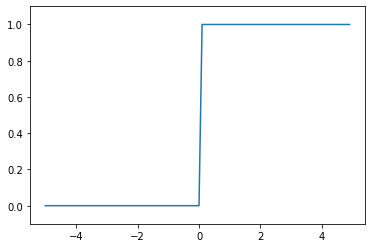

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #指定y軸的範圍
plt.show()

sigmoid函數（類似於階躍函數，但非線形）

`np.exp(-x) : exp(-x)`

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

sigmoid函數圖形化

***sigmoid函數的平滑性對神經網路的學習具有重要意義***

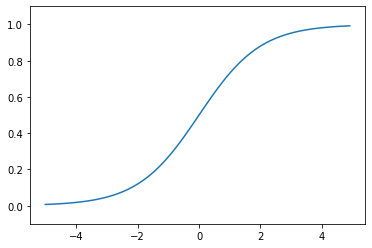

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

神經網路的激活函數一定要用非線形函數，不能用線形函數

因為用線形函數的話，加深神經網路的層數就沒有意義了

問題是在於，不論如何加深層數，總是存在與之等效的*“無隱藏層的神經網路”*

**explain why**：

if using a linear function `h(x) = cx` as a step function,

consider `y(x) = h(h(h(x)))` as a 3 layers NN,

this will do `y(x) = c * c * c * x`, can also be `y(x) = ax`,

as well as there is no hidden layers

ReLU 函數（Rectified Linear Unit）

輸入大於0時，直接輸出該值；輸入小於等於0時，輸出0

`numpy.maximum`會從輸入的數值中選擇較大的那個值進行輸出

In [9]:
def relu(x):
    return np.maximum(0, x)

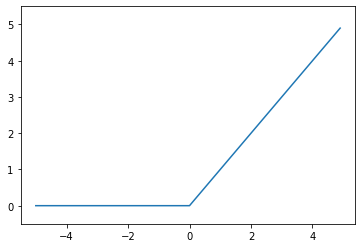

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.5, 5.5)
plt.show()

just a little `numpy`

1D array

In [11]:
A = np.array([1, 2, 3, 4])
print(f'A:\n {A}')
print(f'dim: {np.ndim(A)}')
print(f'shape: {A.shape}')

A:
 [1 2 3 4]
dim: 1
shape: (4,)


2D array, also known as matrix

橫向排列的是 **行**（row），縱向排列的是 **列**（column）

In [12]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(f'B:\n {B}')
print(f'dim: {np.ndim(B)}')
print(f'shape: {B.shape}')

B:
 [[1 2]
 [3 4]
 [5 6]]
dim: 2
shape: (3, 2)


矩陣乘積
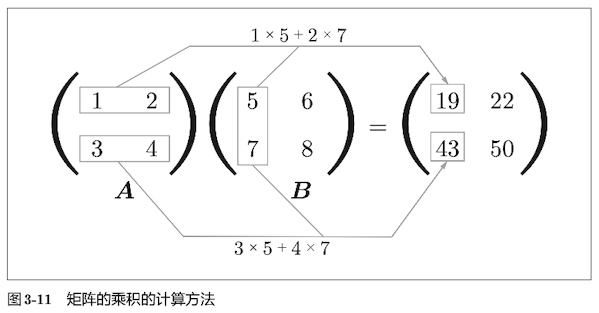

In [13]:
A = np.array([[1, 2, 3], [3, 4, 5]])
B = np.array([[5, 6], [7, 8], [9, 0]])
np.dot(A, B)

array([[46, 22],
       [88, 50]])

In [14]:
a = np.dot(A, B)
b = np.dot(B, A)
a != b

/var/folders/cl/mnp8mwzx3hg265f0p2tv79d00000gn/T/ipykernel_35217/2859474206.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  a != b


True

In [15]:
print(A.shape, B.shape)
print(A.shape[1] == B.shape[0])
assert A.shape[1] == B.shape[0], '矩阵A的第1维的元素个数，必须和矩阵B的第0维的元素个数相等'

(2, 3) (3, 2)
True


實現簡單神經網路（省略偏置和激活函數，只有權重）

testing

In [16]:
X = np.array([1, 2])
X.shape

(2,)

In [17]:
W = np.array([[1, 3, 5], [2, 4, 6]])
W.shape

(2, 3)

In [18]:
Y = np.dot(X, W)
print(Y.shape)
print(Y)

(3,)
[ 5 11 17]


real one

參數：`X`是input，`W`是權重，`B`是偏置

In [19]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

`A`是加權總和，`Z`是被激活函數`h()`轉換後的信號

In [20]:
A1 = np.dot(X, W1) + B1
print(A1)
Z1 = sigmoid(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


第一層到第二層傳遞

In [21]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(W2.shape)
print(B2.shape)
print(Z1.shape)

(3, 2)
(2,)
(3,)


In [22]:
A2 = np.dot(Z1, W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


第二層到輸出層的信號傳遞

`Y`是output

輸出層所用的激活函數，要根據求解問題的性質決定

**一般回歸**問題可以使用`恆等函數`（直接將輸入原樣輸出），

**二元分類**問題可以使用`sigmoid函數`，

**多元分類**問題可以使用`softmax函數`

In [23]:
def identity_function(x):
    return x

In [24]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


make all simple

forword表示只從輸入到輸出方向的傳遞處理

backward表示也會從輸出到輸入方向的處理

In [25]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [26]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [27]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


`softmax`函數

In [28]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
print(f'sum of exp_a: {sum_exp_a}')
y = exp_a / sum_exp_a
print(f'softmax output: {y}')

sum of exp_a: 74.1221542101633
softmax output: [0.01821127 0.24519181 0.73659691]


In [29]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

softmax's problem on computer is **matter**

在電腦運算softmax公式會有溢出問題，

進行指數函數運算的值很容易變到非常大，`e^10`，`e^100`到`e^1000`就會返回代表無窮大的infinite

如果這些超大值之間進行除法運算，結果就會出現‘不確定’的情況

計算機處理‘數’時，數值必須在4字節或8字節的有限數據寬度內。

意味著數存在有效數位 -> 可以被表示的數值範圍是有限的

In [30]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/var/folders/cl/mnp8mwzx3hg265f0p2tv79d00000gn/T/ipykernel_35217/832863605.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
/var/folders/cl/mnp8mwzx3hg265f0p2tv79d00000gn/T/ipykernel_35217/832863605.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [31]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [32]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

so, change our softmax function to

In [33]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(np.exp(a - c))
    y = exp_a / sum_exp_a
    return y

softmax's output will always be `real number` in between 0.0 to 1.0

and **the total of all output will be 1.0** -> could be consider as possibility:

`y[0]` = 1.8%, `y[1]` = 24.5%, `y[2]` = 73.7%

In [34]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


something to keep in mind:

即便使用了`softmax函數`，**各個元素之間的大小關係也不會改變**

因為指數函數 (`y = exp(x)`) 是**單調遞增函數**

實際上上例中`a`的各元素大小關係和`y`的各元素大小關係並沒有改變（`np.max(a) == np.max(y)`）

因此在神經網路在進行分類時，**輸出層**的`softmax函數`**有時候**可以省略，

那在實際問題運算中可以節省計算機運算量（/容量？）

輸出層的神經元數量 -> 需要根據待解決的問題來決定

>對於**分類問題**，輸出層的神經元數量一般設定為**類別的數量**

hands on `MNIST` dataset

用前面的函數先實現看看神經網路的**推理處理** -> **前向傳播（forward propagation）**

和解機器學習問題一樣（**學習**&**推理**兩階段），

用神經網路解決問題時也要用訓練數據進行**權重參數的學習**

在進行推理時，用學習到的參數權重，對輸入數據進行分類

`MNIST`的訓練圖像有6萬張，測試圖像有1萬張

圖像數據是`28像素` * `28像素`的灰度圖像（1通道），像素取值都在`0～255`之間，每個圖像數據都相應地標有其數字的標籤

>*一般是先用訓練圖像進行學習，再用學習到的模型去度量能在多大程度上對測試圖像進行正確的分類*

https://github.com/oreilly-japan/deep-learning-from-scratch.git

要方便一點的用dataset的話就需要從github去`git clone`一些作者寫好的`.py`下來，

不用自己到dataset官網抓了還要前處理資料

第一次會需要下載dataset所以需要網路也要一點點時間，之後如果沒有刪掉就會從local讀取dataset了

（可以自己參考`dataset.mnist`裡面到底在幹嘛）

In [35]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [36]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, #圖像保存為由784個元素構成的一維數組，不然圖像將為1*28*28的三位數組
                                                  normalize=False, #圖像的像素保持原來的0～255，否則將圖像正規化成0.0～1.0的值
                                                  one_hot_label=False) #是否將標籤保存為one-hot representation，False的話就單純以‘7’/‘2’這樣來表示答案標籤
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


看看`MNIST`的圖像，同時確認一下數據

>是不是其實用`plt`也可以用來看`numpy`圖片呢？不一定需要`PIL.Image.fromarray`也行吧？

In [37]:
from PIL import Image

In [38]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [39]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(f'label is {label}')
print(f'shape is {img.shape}')
img = img.reshape(28, 28) #把圖像變為原本的尺寸
print(f'original shape is {img.shape}')
img_show(img) #要看圖片的時候shape要換回原本的，不然是一維數組的話是要看什麼啦

label is 5
shape is (784,)
original shape is (28, 28)


神經網路的推理處理

輸入層有784（圖像大小28*28）個神經元，輸出層有10（10中類別分類）個神經元

第一層隱藏層有50個神經元，第二層隱藏層有100個神經元，（隱藏層的神經元數量可以自己試著設成別的）

`init_network`會讀入保存在`pickle`文件`sample_weight.pkl`中的學習到的權重和偏置參數

In [40]:
import pickle

def get_data():
    '''返回測試資料，因為作者已經訓練過了'''
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, 
                                                      flatten=True, 
                                                      one_hot_label=False)
    return x_test, t_test

def init_network():
    '''之前作者訓練時學習到的權重和偏置參數'''
    with open('ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    '''forward propagation'''
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [41]:
x, t = get_data() # x-test, t-test
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 獲取機率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


`normalize`設置為True後，函數內部會進行轉換，將圖像的各個像素值除以255，使得數據的值在0.0～1.0的範圍內。

像這樣把數據限定到某個範圍內的處理叫**正規化（normalization）**

對神經網路的輸入數據進行某種既定的轉換叫**預處理（pre-processing）**

很多預處理都會考慮到數據的整體分佈：

- 利用數據整體的均值/標準差，移動數據，使數據整體以0為中心分佈
- 或者進行正規化，把數據的延展控制在一定範圍內
- 還有將數據整體的分佈形狀均勻化的方法，**數據白化（whitening）**

Batch processing

剛剛的實作中，多維數組的對應維度的元素個數是一致的，也可以確認看看最終的結果是輸出了元素個數為10的一維數組

整體的處理流程可以看成是，輸入一個由784個元素（28*28的二維數組）構成的一維數組後，輸入一個有10個元素的一維數組，這是只輸入一張圖像數據時的處理流程。

考慮打包輸入多張圖像：

比如想用`predict()`一次性打包處理100張圖像，可以把`x`的形狀為100*784，將100張圖像打包作為輸入數據

輸入數據形狀（100\*784），輸出形狀（100\*10），`x[0]`&`y[0]`中保存了第一張圖及它的結果

這種打包式的輸入數據叫**批（batch）**

In [42]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] # x[0:100], x[100:200], ...
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print(f'Accuracy: {float(accuracy_cnt) / len(x)}')

Accuracy: 0.9352


explain `np.argmax(y_batch, axis=1)`

參數`axis=1`指定了在100\*10的數組中，沿著第1維方向（以第1維為軸）找到值最大的元素的索引（第0維對應第1個維度）

**注意**：`argmax`是返回索引（index），而不是值本身

矩陣的第0維時列方向，第1維是行方向

In [43]:
x = np.array([[0.1, 0.8, 0.1], 
              [0.3, 0.1, 0.6], 
              [0.2, 0.5, 0.3], 
              [0.8, 0.1, 0.1]]) 
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


比較以batch為單位進行分類的結果和實際的答案

用`numpy`數組直接比較產生的`bool`來計算`True`的數量

In [44]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)
print(np.sum(y == t))

[ True  True False  True]
3
